데이터 분석 기초 - 기초 통계량

1. [데이터의 크기](#데이터의-크기)
    - 간단한 통계치
1. [중심경향성: 중앙값, 평균](#중심경향성:-중앙값,-평균)
    - [평균(average)](#평균(average))
1. [최빈값 Mode](#최빈값-Mode)
1. [사분위 Quantile](#사분위-Quantile)
1. [산포도 Disperison](#산포도-Disperison)
1. [편차와 분산](#편차와-분산)
1. [상관관계](#상관관계)
    - 공분산 Covariance
1. [추세 확인](#추세-확인)
    - [산점도 Scatter plot](#산점도-Scatter-plot)
1. [심슨의 역설](#심슨의-역설)
1. [참고](#참고)

# 통계값을 이용한 데이터

데이터는 데이터의 개수, 값 출현 횟수로 규모를 파악할 수 있다.  일반적으로 어떤 데이터 집합에 대한 특징을 나타내는 대표값으로 기본 통계 측정값에 해당하는 평균, 중위수, 최빈수, 범위를 살펴보고 분산과 표준편차를 사용한다.

기술통계(Descriptive stastics) 계산을 제공한다.

 - 데이터 개수 : count
 - 평균: mean, average
 - 분산: variance
 - 표준편차: Standard deviation
 - 최대값: maximum
 - 최소값: minimum
 - 중앙값: median
 - 사분위수: quartile

> 통계학에서 몇몇 통계값이 모집단 데이터인가 표본인가에 따라 약간 차이가 있다. 여기서는 모집단에 대한 계산 방법으로 설명한다.

In [4]:
import numpy as np
import pandas as pd

Text(0.5, 1.0, '한글 타이틀...')

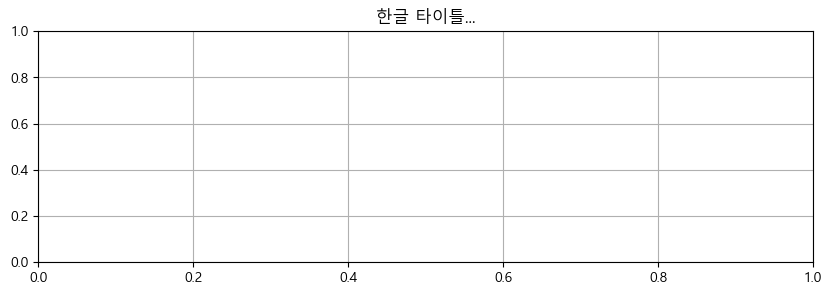

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

# 전역 폰트 설정 사용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

In [ ]:
np.set_printoptions(precision=4)
plt.rc('axes', unicode_minus=False) #Glyph error

# 데이터의 크기

데이터 집합에서 가장 크거나 가장 작은 값으로 데이터의 범위 혹은 크기 정도를 알 수 있다. 예를 들어 어떤 친구들에 대한 데이터가 10~20개 있다면 데이터 자체를 보고 논의해도 좋지만, 데이터 세트가 100만개의 숫자로 구성되어 있다면 저수준의 데이터 자체를 보고 분석한다.

In [2]:
# 어떤 친구에 대한 데이터
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,
               14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,
               7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [4]:
df_friends = pd.Series(num_friends)
# df_friends = pd.DataFrame(pd.Series(num_friends), columns=["F"])
df_friends.head(3)

0    100
1     49
2     41
dtype: int64

In [5]:
df_friends = pd.Series(num_friends)
# df_friends = pd.DataFrame(pd.Series(num_friends), columns=["F"])
df_friends.head(3)

0    100
1     49
2     41
dtype: int64

## 간단한 통계치

 - 개수
 - 최대/최소
 - 정렬

In [6]:
# 데이터 개수
len(df_friends)

204

In [6]:
df_friends.shape

(204,)

최대/최소값을 구하는 문제는 정렬된 리스트의 특정 위치에 있는 값을 구하는 문제로 생각할 수 있다.

In [7]:
df_friends.max(), df_friends.min()

(np.int64(100), np.int64(1))

In [8]:
max(df_friends), min(df_friends)

(100, 1)

정렬한 결과는 리스트의 특정 위치의 값을 구하는 것으로 볼 수 있다.

In [7]:
df_friends.describe()

count    204.000000
mean       7.333333
std        9.030145
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max      100.000000
dtype: float64

In [9]:
sorted(df_friends)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 18,
 18,
 19,
 19,
 21,
 21,
 25,
 40,
 41,
 49,
 100]

In [10]:
df_friends.sort_values()

192      1
193      1
194      1
195      1
196      1
      ... 
4       25
3       40
2       41
1       49
0      100
Length: 204, dtype: int64

### 데이터의 출현 횟수

데이터의 안의 요소의 빈도를 고려할 수 있다.

In [11]:
df_friends.value_counts()

6      22
1      22
4      20
3      20
9      18
5      17
2      17
10     15
7      15
8      13
13      4
15      4
14      2
21      2
18      2
19      2
12      2
25      1
41      1
40      1
100     1
49      1
11      1
16      1
Name: count, dtype: int64

# 중심경향성: 중앙값, 평균

데이터의 중심이 어디인지를 나타내는 중심 경향성 (Central tendency) 지표는 매우 중요하다.  

어떻게 분포되었는지 파악하는 중심경향으로 대부분 데이터 값을 데이터 위치의 개수로 나눈 평균을 사용할 수 있다. 평균을 통해서 각 지표가 전체 지표중에서 어느 위치인지를 파악하기 좋다.

- 평균
- 중앙값

이것은 데이터의 중심경향성과 관련있다.

## 평균(average) 

 - 산술평균: 보통 평균(mean)은 관측치의 총합을 관측치의 개수로 나누어 구한다
 - 기하평균: 관측치 수의 곱을 관측치의 제곱근을 취해서 산술하는 평균값이다.
 - 조화평균:

### 산술평균

산술적으로 데이터의 합을 데이터 개수로 나눈 것이 산술평균이다. 다음 같은 n 개 데이터를 가진 집합 x

$$
x = \{ x_1,x_2,\cdots,x_n \}
$$

이 집합 x의 산술 평균은 다음 같이 계산할 수 있다. 집합 x의 평균은 $\bar{x}$ 로 표기.

$$
\bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{1}{n}(\sum_{i=1}^n{x_i})
$$

In [12]:
# 평균
df_friends.sum() / df_friends.shape[0]

np.float64(7.333333333333333)

In [13]:
df_friends.mean()

np.float64(7.333333333333333)

In [14]:
np.mean(df_friends)

np.float64(7.333333333333333)

### 기하평균 Geometric mean

기하평균(Geometric mean)은 양수 데이터에 대한 곱의 평균이다. 즉, 모두 곱하고 그 개수로 거듭제곱한 값이다. 그래서 경제성장률, 인구증가율을 나타낼 때 볼 수 있다.

어떤 나라 경제규모가 x 달러인데, 1년동안 2배로 커져 2x 달러가 됐다면 경제성장률은 100%가 된다. 그 다음해 경제 규모가 1/2로 줄어 x달러가 되면 경제 성장률은 -50%가 된다. 이때 2년 동안 경제성장률을 1년 단위 평균을 내면 산술평균으로는 (2+0.5)/2=1.25배가 된다. 2년간 성장하지 않고 그데론데 성장률이 1.25배라는 계산은 부적절하다.

그래서 같은 기준을 가진 비율의 다른 형태로 변할 때 다면체의 면적을 유지하면서 형태가 바뀌는 계산 방법인 **기하평균Geometric mean**을 사용한다.

이렇듯 기하평균은 기하학적 형태의 변경에 유용한다. 넓이는 그대로 유지하면서 직사각형을 정사각형으로 바꿀 때 기하평균이 이용된다. 가로 길이 8, 세로 2인 직사각형과 넓이가 같은 정사각형의 한 변 길이가 8과 2의 기하평균이다.

$$ 8 \times 2 = 4^2 \Leftrightarrow \sqrt{8\times 2} = 4
$$

동일하게 직육면체에서 직육면체로 바꿀 때도 기하평균이 이용된다. 가로,세로,높이 a,b,c인 직육면체와 부피가 같은 정육면체 한 변의 길이가 바로 a,b,c의 기하평균이다. 즉,

$$\sqrt[3]{a b c }
$$

참조: [산술평균과 기하평균 관계](https://m.blog.naver.com/PostView.nhn?blogId=alwaysneoi&logNo=100156668769)


기하평균의 계산식은 


$$ ( \prod_{i=1}^{n} a_{i} )^{\frac{1}{n}} = (a_1\cdot a_2 \cdot \cdots a_n )^{\frac{1}{n}} = \sqrt[n]{a_1\cdot a_2 \cdot a_3 \cdots a_n}
$$

Scipy 의 stats 모듈의 `.gmean()` 함수로 계산할 수 있다.

In [8]:
!pip install scipy

In [16]:
from scipy import stats

stats.gmean(df_friends)

np.float64(5.089843207884895)

In [9]:
from scipy import stats

stats.gmean(df_friends)

np.float64(5.089843207884895)

### 조화평균

조화평균(Harmonic mean)은 **역수의 산술평균의 역수**이다. 역수의 차원에서 평균을 구하고, 다시 역수를 취해 원래 차원의 값으로 돌아오는 것이다.

> 역수의 평균의 역수를 조화평균이라 부르는 이유는 음악의 화음(harmony)에서 이 평균을 찾을 수 있기 때무닝다. 화음은 주파수가 1:2:3 같이 간단한 정수 간격을 이룰 때 발생한느데 현의 길이는 주파수의 역수이다. 즉 화음을 이루는 현의 길이를 구하기 위해서는 역수(주파수)의 평균을 구하고 다시 그 값의 역수(현의 길이)로 되돌아 온다.

참조: https://wikidocs.net/23088

예를 들어 갈 때 10m/s 이고, 올 때 20m/s로 주행한다. 평균 속력은?

갈 때와 올 때 투여한 시간이 다르기 때문에 산술평균은 답이 아니다. 여기서는 시간 차원에서 평균을 구해야 한다. 거리를 속력으로 나누면(역수) 시간인데 이 시간의 평균을 구한 후에 구한 시간 값에 대해 다시 속력으로 바꾼 것이 평균 속력이다. 

시속 100km 한 시간 달려야 하는 길을 왕복하려고 한다. 갈 때 80km/h 로 간다. 나머지를 어느 속력으로 달려야 2시간에 왕복이 가능한가? 어뜻 시속 120km 일 것 같지만 늦게 된다.

시속 100km로 한시간 달린 거리는 100km,  이 거리를 시속 80km로 달리면 100/80 = 5/4 시간. 시속 120으로 달리면 100/120 = 5/6 시간이므로 5/4 + 5/6 = 25/12 시간이 된다. 따라서 1/12시간 5분이 더 걸린다.


거리를 S, 시간 x에 대한 식을 세우면

$$
\frac{S}{10} + \frac{S}{20} = \frac{2S}{x}
$$

이다. 이 예제를 일반화해 갈 때 속력을 a, 올 때 속력을 b라 하면 조화평균은

$$
x = \frac{2ab}{a + b}
$$

이다.

$$조화평균 = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\frac{1}{x_3} + \cdots + \frac{1}{x_n}}
$$

In [17]:
# scipy.stats.hmean() 사용
stats.hmean(df_friends)

np.float64(3.519068071581347)


### 중앙값 Median

데이터에서 가장 가운데 위치한 값을 사용하기도 한다. 중앙값(중위수, Median)은 데이터에서 가장 가운데 위치한 값을 말한다.

데이터 집합에서 중앙값을 찾기 위해서는 데이터 개수가 홀수라면 가장 가운데 위치 값을 사용하고, 짝수라면 가장 중앙에 있는 두 데이터의 평균을 의미한다. 데이터 개수에 따라서 아래 같이 찾는다.

- 홀수라면 가장 가운데 위치 값을 사용한다.
- 짝수라면 가장 중앙에 있는 두 데이터의 평균을 사용한다.

$$
Median = \begin{cases}
\frac{n+1}{2}, & \mbox{  n이 홀수} \\
\frac{n}{2} 와 \frac{n}{2}+1 번째 값의 평균, & \mbox{n이 짝수 }
\end{cases}
$$

In [18]:
df_friends.median()

np.float64(6.0)

In [19]:
np.median(df_friends)

np.float64(6.0)

### 중앙값과 평균

평균은 중앙값보다 간편하게 계산할 수 있다. 데이터가 변경되도 값의 변화가 부드럽다. 만약 n개의 데이터가 있을 때, 그 중 한 값이 작은 수 e 만큼 증가한 다면 평균은 e/n 만큼 증가할 것이다. (이런 성질 때문에 평균에 다양한 미적분 기법을 적용할 수 있다)

중앙값을 찾기 위해서는 데이터르 정렬하고, 요소의 값이 작은 수 e 만큼 증가한다면 중앙값은 e 만큼 증가할 수 도 있고, 작게 증가할 수 잇다. 심지어는 주어진 데이터에 따라 중앙값이 변하지 않을 수 있다.

하지만 평균은 **이상치(Outier, 이상점)** 에 매우 민감하다. 가령 num_friends에 200명의 친구가 있다고 할 때 평균은 7.82 만큼 증가하지만 중앙값은 변하지 않을 것이다. 이렇듯 평균은 이상치가 나쁜 데이터라면 잘못된 정보를 줄 수 있다.

> 예를 들어 1980년대 노스캐롤라이나 대학 전공 중에서 지리학과 졸업생 초봉이 가장 높은 과로 조사되었다. 이유는 지리학을 전공한 NBA 최고 스타 마이클 조던의 연봉 때문이다.



## 최빈값 Mode

최빈값(mode)은 데이터에서 가장 빈번하게 출현하는 값이다. 그리고 히스토그람에서 가장 높은 막대가 최빈값이 된다.


DataFrame.mode() 이용

In [22]:
df_friends.value_counts()

6      22
1      22
4      20
3      20
9      18
5      17
2      17
10     15
7      15
8      13
13      4
15      4
14      2
21      2
18      2
19      2
12      2
25      1
41      1
40      1
100     1
49      1
11      1
16      1
Name: count, dtype: int64

In [23]:
df_friends.mode()

0    1
1    6
dtype: int64

In [25]:
df_friends.value_counts().mode()

0    1
Name: count, dtype: int64

`[5, 5, 5, 4, 4, 4, 9, 1, 3]` 같이 최빈값이 여러개인 데이터는 어떻게 처리해야 하나? 

In [26]:
pd.Series([5, 5, 5, 4, 4, 4, 9, 1, 3]).value_counts()

5    3
4    3
9    1
1    1
3    1
Name: count, dtype: int64

In [27]:
pd.Series([5, 5, 5, 4, 4, 4, 9, 1, 3]).mode() #.value_counts()

0    4
1    5
dtype: int64

### 평균, 중앙값, 최빈값 차이

In [28]:
from scipy.stats import skewnorm

data = skewnorm.rvs(10, size=1000)
data_mean = data.mean()
data_median = np.median(data)
rows, counts = np.unique(data, return_counts=True)
data_mode = data[counts.max()]

/home/qkboo/.pyenv/versions/DL_P312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qkboo/.pyenv/versions/DL_P312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qkboo/.pyenv/versions/DL_P312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qkboo/.pyenv/versions/DL_P312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qkboo/.pyenv/versions/DL_P312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: Us

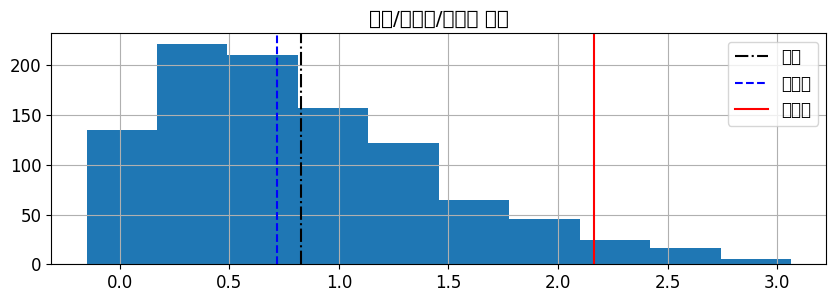

In [29]:
plt.hist(data)
plt.axvline(data_mean, c='k', ls='-.', label='평균')
plt.axvline(data_median, c='b', ls='--', label='중앙값')
plt.axvline(data_mode, c='r', ls='-', label='최빈값')
plt.title('평균/중앙값/최빈값 비교')
plt.legend()
plt.show()

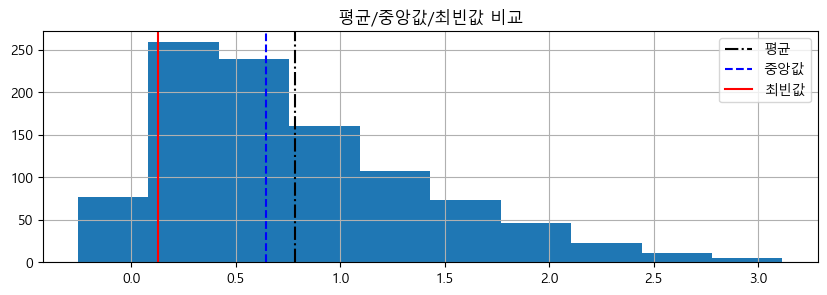

In [10]:
from scipy.stats import skewnorm

data = skewnorm.rvs(10, size=1000)
data_mean = data.mean()
data_median = np.median(data)
rows, counts = np.unique(data, return_counts=True)
data_mode = data[counts.max()]
plt.hist(data)
plt.axvline(data_mean, c='k', ls='-.', label='평균')
plt.axvline(data_median, c='b', ls='--', label='중앙값')
plt.axvline(data_mode, c='r', ls='-', label='최빈값')
plt.title('평균/중앙값/최빈값 비교')
plt.legend()
plt.show()

## 산포도 Disperison

산포도(Dispersion)은 데이터가 얼마나 퍼져있는지를 보여준다. 보통 산포도 값이 0에 근접하면 데이터가 거의 퍼저 있지 않다는 의미이고, 그보다 크면 매우 퍼져 있다는 의미이다. 산포도를 측정하는 방법으로 **범위range**, **분위variance**, **표준편차 standard deviation** 이 있다.


### 데이터의 범위 - range

가장 큰 값과 작은 값의 차이가 범위가 된다. 보통 산포도 함수는 range()를 쓰는데, 파이썬에는 range()라는 리스트 함수가 있다.


In [ ]:
df_friends.min(), df_friends.max(), df_friends.max() - df_friends.min()

`nsmallest()`, `nlargeest()` 로 row 단위로 확인 가능하다.

In [ ]:
df_friends.nsmallest()

In [ ]:
df_friends.nlargest()

산포도에서 0,100 으로 구성된 데이터나, 0,100 그리고 50으로 구성된 데이터는 동일한 퍼짐을 갖는다. 데이터만 보면 0,100 이 더 포진 느낌이 든다.

## 편차와 분산

데이터가 평균을 기준으로 얼마나 퍼져 있는지를 알려주는 지표가 분산(Variance) 과 편차(Deviation) 이다. 
 - 편차은 값이 평균에서 얼마나 떨어졌는지를 알려주고, 
 - 분산은 요소들의 편차를 측정해 산포도를 측정하는 개념이다.



### 편차 Deviation

편차은 값이 평균에서 얼마나 떨어졌는지를 살펴본다.

In [ ]:
# Deviatino 편차
_de = (df_friends -  df_friends.mean())
_de


### 분산 Variance

분산은 요소들의 편차를 측정해 평균을 기준으로 얼마나 퍼져있는지를 알 수 잇다.

분산은 편차(차이)의 제곱을 평균한 값이다. 분산은 다음 공식을 이용해 계산한다.

$$ var = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 
$$

분산 값이 높다는 것은 평균에서 멀리 떨어져 있다는 것이다. 낮은 분산 값은 평균에 가깝게 뭉쳐 있다는 것을 의미한다. 


> 아래에서 편차의 제곱의 평균을 계산시 n-1로 나눈는 것은, 편차의 제곱합을 n으로 나누면 bias 때문에 모분산에 대한 추정값이 실제 모분산 보다 작게 계산되는 것을 보정해 주기 위함이다.

In [ ]:
# Variation
# Sum of Squares
_de = (df_friends -  df_friends.mean())
_var = (_de.pow(2)).sum() / (len(df_friends)-1)
_var

In [ ]:
df_friends.var()

## 표준편차

표준편차는 분산의 제곱근을 구하면 된다. 

$$
std = \sqrt{var}
$$



> 값이 평균의 표준편차 내에 있는 값은 일반적이지만 평균으로 부터 3개 이상의 표준편차의 값은 비정상 혹은 이상치Outlier 라고 한다.

> 산포에서 분산과 표준편차를 쓰는 이유는, 데이터의 단위에 관계없이 중심경향성은 같은 단위를 가진다. 산포도 범위range 또한 같은 단위이다. 하지만 분산의 단위는 제곱이다. 그렇기 때문에 분산 대신 원래 단위와 같은 단위를 가지는 표준편차 Standard Deviation을 이용할 때가 많다.

In [ ]:
_de = (df_friends -  df_friends.mean())
_var = (_de.pow(2)).sum() / (len(df_friends)-1)
np.sqrt(_var)

In [ ]:
df_friends.std()

## 사분위수 Quantile

사분위수는 데이터를 작은 수에서 가장 큰 수까지 커지는 순서대로 정렬했을 때 1/4(25%), 2/4(50%), 3/4(75%) 위치에 있는 수를 1사분위수, 2사분위수, 3사분위수라고 한다.  전체 데이터에서 1/4 위치는 하위 25% 를 말하므로 2/4 위치인 2사분위수는 중앙값과 같다.

Numpy에서 `np.percentile(a, [0,25, 50, 70, 100])` 을 사용한다.

In [ ]:
# numpy.percentile()
np.percentile(df_friends, 10), np.percentile(df_friends, 25), np.percentile(df_friends, 50),np.percentile(df_friends, 75)

In [ ]:
np.percentile(df_friends, [i for i in range(0, 100, 25)])

Pandas에서는 [DataFrame.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) 

```python
DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
```

In [ ]:
df_friends.quantile(q=.1)

In [ ]:
for i in np.arange(0, 1, .25):
    print(i)
    df_friends.quantile(q=i)

In [ ]:
df_friends.quantile(q = [i for i in np.arange(0, 1, .25)])

#### 사분위수와 boxplot

boxplot은 사분위수를 이용해 퍼진 정도를 확인할 수 있다., 3사분위 이상의 점들은 이상치 분포이다.

In [ ]:
plt.boxplot(data)
plt.show()

# 왜도(Skew) / 첨도(Kurtosis)

왜도는 평균과의 거리의 세 제곱을 이용해 구한 특정 값으로 보통 평균을 기준으로 그패프가 치우친 정도를 확인한다.

첨도는 평균과의 거리의 네 제곱을 이용해 구한다, 주로 데이터가 중앙에 몰려있는 정도를 정밀하게 비교할 때 사용.

### Stats 로 Skewed data

 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html


In [ ]:
from scipy.stats import skewnorm

data1 = skewnorm.rvs(10, size=100)
data2 = skewnorm.rvs(-10, 10, size=100)

In [ ]:
# Skew
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.kdeplot(data=data1, ax=axs[0])
sns.kdeplot(data=data2, ax=axs[1])

정규분포일 때 왜도는 0이고 왼쪽으로 치우치면 + 값 "양의 왜도", 오른쪽으로 치우치면 - 값 "음의 왜도" 이다.

#### Numpy 로 Skewed data

 - https://stackoverflow.com/questions/36200913/generate-n-random-numbers-from-a-skew-normal-distribution-using-numpy

In [ ]:
def randn_skew_fast(N, alpha=0.0, loc=0.0, scale=1.0):
    sigma = alpha / np.sqrt(1.0 + alpha**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

In [ ]:
# Skew
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.kdeplot(data=randn_skew_fast(100, 1.0), ax=axs[0])
sns.kdeplot(data=randn_skew_fast(100, 0.1), ax=axs[1])

### 첨도( Kurtosis)

정규분포곡선의 뽀족한 정도를 말하며 정규분포시 첨도는 0이고 위족으로 치우치면 +, 아래쪽으로 치우치면 - 값을 갖는다.

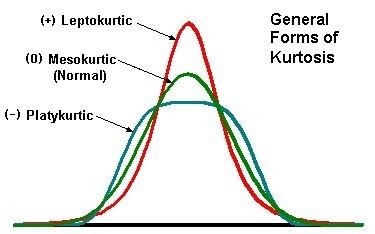

In [ ]:
# 분포 곡선
sns.displot(np.linspace(0.0, 1.0, 30), kind='kde')

## 이상치 데이터 제거 후 모델 학습/예측/평가

 - 참조: ML_with_Python_Sklearn/sklearn-4.3.2캐글_신용카드.ipynb

***이상치(Outlier)*** 는 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터이다.  분산과 표준편차도 평균 같이 이상치에 민감하게 반응하는 문제가 있다. 이런 문제를 극복하는 안정적인 방법은 75%(상위 25%)에 해당하는 값과 하위 25%에 해당하는 값의 차이를 계산하는 것이다. 이것으로 몇몇 이상치가 주는 영향을 제거할 수 있다.

이상치를 추출하는 여러 방법이 있지만 ***IQR(Inter Quantile Range)*** 방식을 적용해 보자. 데이터에서 25% Q1구간 부터 75% Q3구간의 사분위 값의 편차를 이용하는 것으로 박스플롯 방식으로 시각화 할 수 있다.

참고:
 - [자료 탐색 및 정규성 검정](https://dermabae.tistory.com/?page=27)

IQR 를 이용해 이상치를 검출하는 방식은 보통 IQR에 1.5를 곱해서 생성된 범위를 이용해 최대값과 최솟값을 결정한 뒤 최대값을 초과하거나 최소값에 미달하는 데이터를 이상치로 간조하는 것이다. 3/4 분위수 Q3에 `IQR*1.5`를 더해서 최대값으로 가정하고, 1/4 분위 Q1에 `IQR*1.5` 를 빼서 최솟값으로 가정한다. 경우에 따라 1.5가 아닌 다른 값을 이용하기도 한다. 

이렇게 결정된 최대값 보다 큰 값, 최소값 보다 작은 값을 이상치로 간주한다.

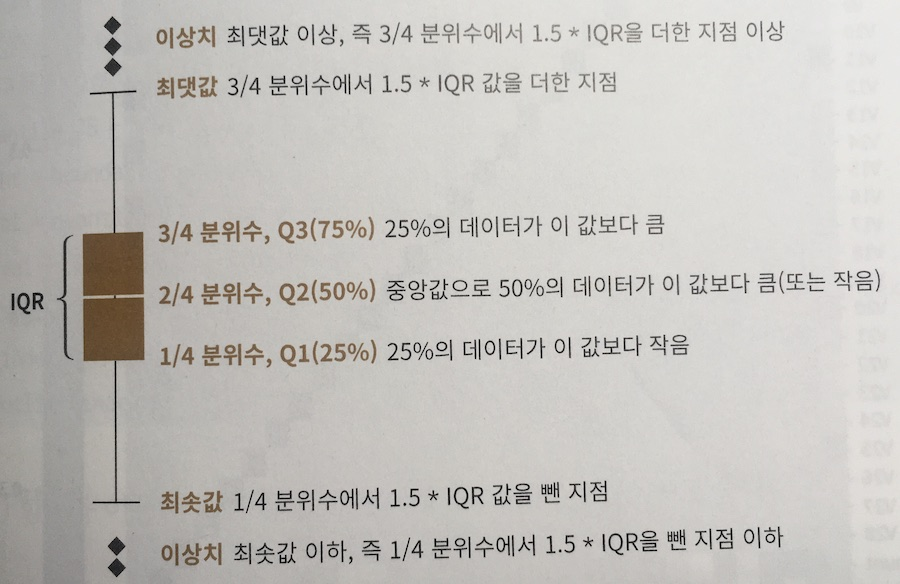

이상치 검출...

In [ ]:
friends_n = np.array(num_friends)

In [ ]:
weight = 1.5
q75 = np.percentile(friends_n, 75)
q25 = np.percentile(friends_n, 25)
iqr = q75 - q25                    # 75% - 25%
iqr_weight = iqr * weight
lowest_val = q25 - iqr_weight
highest_val = q75 + iqr_weight

In [ ]:
friends_n[friends_n > lowest_val]

In [ ]:
friends_n[friends_n > highest_val]

In [ ]:
# 정리
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

## 상관관계

예를 들어 "사용자가 사이트에서 보낸 시간과 사용자의 친구 수 사이의 연관성"이 있다는 가설을 검증하려고 한다. 이런 두 데이터 세트 사이의 관계를 상관관계로 분석한다.

여기서 먼저 분산과 비슷한 공분산을 살펴보자.

### 공분산(Covariance, Commaon Variance)

분산은 한 변수가 평균에서 얼마나 떨어져 있는지를 살펴본다. 공분산은 ***두 변수가 각각의 평균에서 얼마나 떨어져 있나*** 를 살펴본다.

그래서 공분산이 양수 이면 x값이 클수록 y 값이 크고, x 값이 작을 수록 y 값도 작다. 반대로 음수이면 x값이 클수록 y값이 작고, x값이 작을 수록 y값이 크다는 의이미다. 공분산이 0이면 그와 같은 관계가 성립하지 않는다는 의미이다.


In [ ]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

공분산 단위가 데이터 요소들을 곱해서 계산하므로 이해하기 쉽진 않다. (예를 들어 친구 수 X 하루 사용량(분) 이라는 단위는 어떤 의미인가?)

그러므로 모든 사용자의 하루 사용량은 변하지 않고 친구 수만 두 배로 증가한다면 공분산 또한 두 배로 증가할 것이다 하지만 두 변수의 상관관계는 변하지 않는다. 이것은 값이 커진다고 공분산이 크다고 판단하기 어렵게 한다.  이런 이유로 공분산에서 표준편차를 나눠 준 상관관계를 더 자주 살펴본다. 

두 데이터 사이의 관계의 특성과 강도를 알려주는 통계 측정값으로 피어슨 상관계수가 있다. 


### 피어슨 상관계수(Pearson's product-moment correlation coefficent)

연속형 변수 2개의 상관 관계를 확인하는 방법이다. 두 개의 수치값 집합에서 수치값 각각의 순서쌍에 대해 연결 관계가 있다고 할 때 관련성을 확인하는 것이다.

예를 들어 고등학교 한 학급에 50명이 있고 국어, 영어, 수학, 과학 시험을 치른 결과가 있을때, 이 중에서 과학과 수학 과목의 성적이 서로 관련있는지 파악할 수 있다.

피어슨 상관계수는 정규분포에서 가장 잘 작동하도록 설계되어 있다.

- [상관관계](http://intothedata.com/02.scholar_category/statistics/correlation/) 참조.


#### 상관 관계의 측정

**피어슨 상관계수**는 간단히 상관계수라고 하면 두 집단 사이의 관계의 선형 관계를 측정해 볼 수 있다.  예를 들어 *사용자가 사이트에서 보낸 시간과 소셜 친구수 사이의 연관성* 같은 가설을 검증할 수 있다.

상관계수는 *-1.0~1.0* 사이의 값을 갖으며, 0에 가까울 수 록 관계가 없음을 1에 가까울 수록 강한 양의 관계를 표현한다.


 - 상관계수가 0이면 두 집단간 선형 관계가 없다는 의미이다. 
     (그렇다고 서로 독립적이라는 의미는 아니다 - 둘 사이 비선형 관계가 있을 수 있다.), 
 - 1이거나 1에 가까우면 강한 양의 선형 관계가 있음을 의미하고, 
 - 1이면 완전한 양의 상관관계이다.
 - -1이거나 -1에 가까우면 강한 음의 관계가 있고
 - -1은 완전한 음의 상관관계이다.


**[상관 계수에 대한 주요 결과 해석](https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/key-results/)**

- 강도:
    상관 계수 값의 범위는 −1부터 +1까지로, 계수의 절대값이 클수록 변수 사이에 강한 관계가 있습니다. Pearson 상관의 경우 절대값 1은 완전한 선형 관계를 나타냅니다. 0에 가까운 상관 값은 변수 사이에 선형 관계가 없음을 나타냅니다.
- 방향:
    계수의 부호는 관계의 방향을 나타냅니다. 두 변수가 함께 증가하거나 감소하는 경향이 있으면 계수가 양수이며, 상관을 나타내는 선이 위쪽 방향으로 기울어집니다. 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있으면 계수는 음수이며, 상관을 나타내는 선이 아래쪽 방향으로 기울어집니다.
    

> 또한 두 집단 사이의 비선형 상관계수를 측정하는 방법도 있지만 여기서는 다루지 않는다.



상관계수

 - 단위가 없다.
 - 완벽한 음의 상관관계: -1
 - 완벽한 양의 상관관계 : 1
 - 편차가 존재하지 않다: 0

예를 들어 상관관계가 0.25라면 약한 양의 상관관계라고 한다.

### 상관계수 계산

상관계수 Correlation 공식다음 같다. 같은 크기의 숫자 집합 x, y라고 하고 n은 숫자 집합 값의 개수이다.

$$
Correlation = \frac{n\sum xy - \sum x \sum y}{\sqrt{(n\sum x^2 - (\sum x)^2)(n\sum y^2 - (\sum y)^2)}}
$$
 


예를 들어 친구 수 X 하루 사용량(분) 이라는 단위는 어떤 의미인가?

In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,
                 19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
                 44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,
                 34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,
                 20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,
                 19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,
                 24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,
                 13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                 31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,
                 31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [ ]:
np.corrcoef(df_friends, daily_minutes)

In [ ]:
df_friends.corr(pd.Series(daily_minutes))

## 추세 확인

데이터의 특성을 기초적인 요소별 특성으로 확인하고 시각적으로 확인하는 좋은 방법은 히스토그램으로 그려서 분포, 이상치 등을 파악하는 것이 중요하다.

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(df_friends)
plt.bar(range(101), df_friends[:101])
# plt.axis([0, 101, 0, 25]) #x,y축의 [시작, 끝,] 지시
plt.xlabel('# of firends')
plt.ylabel('# of people')
plt.show()

In [ ]:
plt.hist(df_friends)

### 산점도 Scatter plot

프란시스 안스콤 francis Anscombe이 작성한 *Graphs in Statistical Analysis* 를 보길 바란다. 이 연구는 다른 데이터 집합을 고려해 안스콤의 과르뎃 Anscombe quartet라고 한다. (https://matplotlib.org/gallery/specialty_plots/anscombe.html)

<img src='https://matplotlib.org/_images/sphx_glr_anscombe_001.png' width='500'>

안스콤의 콰르텟의 통계측정 값은 모두 같게 나타난다. 하지만 산점도로 표시하면 가각 다르다는 것을 알 수 있다.

In [ ]:
plt.scatter(df_friends, daily_minutes)
plt.grid()
plt.title("Correlation")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

## 심슨의 역설

데이터을 분석하다 보면 혼재변수(confounding variables)가 누락되어 상관관계가 잘못 계산되는 심슨의 역설(Simpson's Paradox)를 직면한다. 

통계학에서 자주 *상관관계가 우연을 의미하지는 않는다* 라는 문구를 읽게 된다. 이 문구는 두 개의 관측 값 집합이 매우 강한 상관관계일지라고, 한개의 변수가 다른 변수의 원인이 됨을 의미하지는 않는다. 두 개의 변수가 강한 상관관계에 있을 때 때로는 두 변수에 영향을 주고 상관관계를 설명하는 3번째 인자가 있을 가능성이 높다.

> 고전적 사례를 들면 아이스크림 판매량과 범죄율 간의 상관 관계이다. 일반적인 도시에서 두 변수 간의 관계를 추적해 보면 여러분은 상관관계를 쉽게 찾아낼 수 있다. 하지만 이런 관계가 범죄율이 늘어나는 원인 혹은 영향을 준다고 할 수 없다. 아이스크림 판매량과 범죄율은 여름의 더워진 날씨에 따라 상승하기 때문에 상관관계는 높지만 이또한 뜨거운 날씨가 범죄율이 높이는 원인은 아니다. 상관관계 이면에는 더 복잡한 원인들이 숨어있기 마련이다.


다음같이 동부/서부 지역 학자 데이터에서 어느 지역이 친구가 많은지 분석한다고 하자.

| 지역 | 사용자 수 | 평균 친구 수 |
| -------- | ------- | -------- |
| 서부 | 101명 | 8.2명 |
| 동부 | 103명 | 6.5명 |

일견하기엔 서부 지역이 월등히 친구가 많아 보인다

세부적으로 학위를 가진 사용자를 중심으로 내용을 파악해 보다 보니 다음 같은 데이터가 얻어 졌다.

| 지역 | 학위 | 사용자 수 | 평균 친구 수 |
| ------| ------ | ------- | -------- |
| 서부 | 박사  | 35명 | 3.1명 |
| 동부 | 박사 | 70명 | 3.2명 |
| 서부 | 기타 | 66명 | 10.9명 |
| 동부 | 기타 | 33명 | 13.4명|

사용자 학위를 고려하면 동부지역 박사 학위를 가진 사람이 친구가 많고, 동부직역 기타도 월등히 친구가 많은 것을 알 수 있다.

이렇듯 학위를 고려하면 상관관계가 반대로 변하는 경우를 많이 만나게 된다. 이런 문제를 피하기 위해서는 데이터를 이해하고 변수에 영향을 주는 모든 요인을 확인하는 방법밖에 없다.

#### 예) 성적 관련

다음 데이터는 고등학교 성적의, 수능 성적 데이터다. 그래프에서 점의 위치로 성적에 따른 대입 성적의 존재를 파악할 수 있다. 낮은 성적에도 높은 대입시험 성적이 있는 반면, 높은 고등학교 성적에도 낮은 대학시험 성적인 학생이 있는 것을 알 수 있다.

In [ ]:
x = np.array([90, 92, 95, 96, 87, 87, 90, 95, 98, 96]) #고등학교 성적
y = np.array([85, 87, 86, 97, 96, 88, 89, 98, 98, 87]) # 수능 성적

plt.scatter(x, y)
plt.title('The Scatter Figure')
plt.ylabel('대입시험 성적')
plt.xlabel('고등학교 성적')
plt.show()

두 점수 사이의 상관계수는 양의 상관관계를 갖지만 강하지는 않다.

In [ ]:
np.corrcoef(x, y)[0, 1]

그런데 아래 같이 고등학교 수학성적과 수능 성적을 비교하면, 고등학교 수학성적이 비례해서 대입시험 수학 성적에 나타나는 것으로 판단되고, 상관계수도 1에 가까와 강한 관계임을 알 수 있다.

In [ ]:
x = np.array([83, 85, 84, 96, 94, 86, 87, 97, 97, 95]) #고등학교 수학 성적
y = np.array([85, 87, 86, 97, 96, 88, 89, 98, 98, 87]) # 수능 성적

np.corrcoef(x, y)[0, 1]

### 상관관계에 대한 추가적인 경고

상관관계가 0이라는 것은 둘 사이에 선형적인 관게가 없다지만 다른 종류의 관계가 존재할 수 있다. 

아래는 상관관계가 0이다. 하지만 ***y는 x의 절대값이라는 관계*** 를 가지고 있다. 상관관계에서 데이터의 평균에서 각요소의 관계를 살펴보는 방식으로는 설명할 수 없는 것이다.

In [ ]:
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]

In [ ]:
np.corrcoef(x, y)

또한 상관관계는 연관성이 얼마나 크고 작은지 설명해 주지 않는다. 아래 데이터에서 두 변수는 완벽히 연관되어 있다고 나온다.

In [ ]:
x = [-2, -1, 0, 1, 2]
y = [ 99.98, 99.99, 100, 100.01, 100.02]
np.corrcoef(x, y)

### 상관관계와 인과관계

"*상관관계는 인과관계를 의미하지는 않는다.*"

x와 y가 강한 상관관계를 보인다면 x가 y를 발생시켰다고 볼 수도 있고, y가 x를 발생시켰다고 볼 수 도 있다. 혹은 서로가 동시에 발생시키거나 아무런 인과관계가 없을 수 있다.

예를 들어 친구가 많은 사용자는 친구가 많기 때문에 사이트에서 더 많은 시간을 보낸다고 볼 수 있다. 만약 각각의 친구들이 일정량의 새 글을 매일 올린다면 친구 수가 많을 수록 새 글을 확인하기 위해서 더 오랜 시간 사이트에서 보낼 것이다.

그런데 다른 사용자와 소통하며 시간을 보내다 보면 다른 친구를 찾는데 시간을 더 보낼 수 있으므로 사이트에서 오랜 시간을 보낼 수록 친구 수가 증가할 가능성이 있다.

인과관계를 확인해 보는 방법 중에 데이터 위치를 무작위로 선택해, 사용자를 비슷한 조건과 성질의 두 그룹으로 나누고 한 그룹에 다른 요인을 적용해 보면 해당 요인과 결과의 인과관계를 확인해 볼 수 있다.

예를 들어 무작위로 일부 사용자를 선별해 각 사용자에게 일분 친구들의 글만 보여준 후에 선별된 사용자가 사이트에서 더 적은 시간을 보낸다면 친구수가 증가하는 경우에 사이트에서 시간을 보낸다는 가설이 맞을 수 있다.


---

# 참고



 - 데이터 분석을 떠받치는 수학 / Ch1
 - 밑바닥부터 시작하는 데이터 과학 / 5장-통계
    - 책 소스: https://github.com/Insight-book/data-science-from-scratch/blob/master/notebook/ch05_statistics.ipynb
 - [수학으로 생각하기. 평균도 다양하다](http://www.kias.re.kr/etc_img/bbs_file/201104081325201.pdf)
 - [산술평균과 기하평균 관계](https://m.blog.naver.com/PostView.nhn?blogId=alwaysneoi&logNo=100156668769)